# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(mouse_metadata, study_results, how="right", on=['Mouse ID'])

# Display the data table for preview
data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [90]:
# Checking the number of mice.
len(data_complete['Mouse ID'].unique())

249

In [91]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = data_complete.loc[data_complete.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [92]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = data_complete.loc[data_complete["Mouse ID"] == "g989", :]
dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [93]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_duplicate_data = data_complete[data_complete["Mouse ID"].isin(duplicate_mice)==False]
no_duplicate_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [94]:
# Checking the number of mice in the clean DataFrame.
len(no_duplicate_data['Mouse ID'].unique())

248

## Summary Statistics

In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#  mean, median, variance, standard deviation, and SEM of the tumor volume.

mean = data_complete.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
median = data_complete.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
variance = data_complete.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
std = data_complete.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
sem = data_complete.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
summary =pd.DataFrame({'Mean Tumor Volume':mean,
                          'Median Tumor Volume':median,
                          'Variance Tumor Volume':variance,
                          'Tumor Volume Std. Dev.':std,
                          'Tumor Volume Std. Err.': sem})

summary

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [96]:
# Using the aggregation method, produce the same summary statistics in a single line.
no_duplicate_data.groupby(['Drug Regimen'])[["Tumor Volume (mm3)"]].aggregate(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

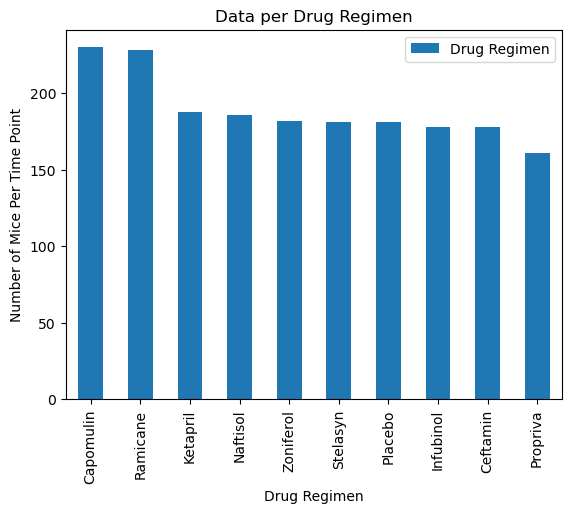

<Figure size 640x480 with 0 Axes>

In [97]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
drugs_total = pd.DataFrame(pd.value_counts(data_complete["Drug Regimen"]))
drugs_total

# Plot bar graph
drugs_total.plot(kind = "bar")
plt.title("Data per Drug Regimen")
plt.ylabel("Number of Mice Per Time Point")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

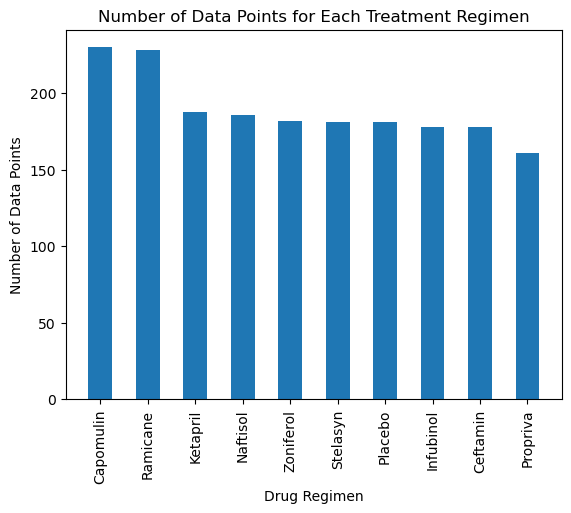

In [98]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Calculate the amount of data points for each drug regimen
timepoint_tot = data_complete['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(timepoint_tot))

# Generate a bar blot with the length of the 'counts' series
# as the amount of values on the x axis, and the corresponding values
# in the series as the y values
plt.bar(x_axis, timepoint_tot, width = 0.5, align = "center")

# Label the tick marks according to the index values in the 'counts' series
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoint_tot.index.values)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Number of Data Points for Each Treatment Regimen')

# Display resulting plot
plt.show()

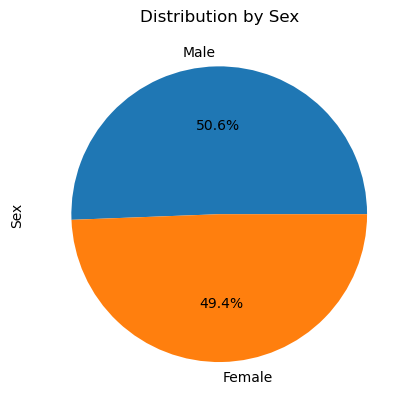

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Identify distribution of data by sex
sex_data = data_complete['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
pie_plot = sex_data.plot.pie(autopct="%1.1f%%", startangle=0, title='Distribution by Sex')


([<matplotlib.patches.Wedge at 0x1fbe74e26a0>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

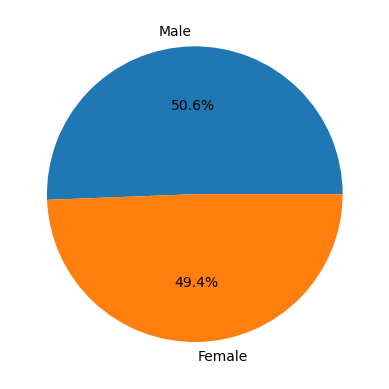

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sex = data_complete["Sex"].value_counts()

# The colors of each section of the pie chart
# colors = ["blue", "orange"]

# Creates the pie chart based upon the values above
plt.pie(sex, labels=labels,
        autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [101]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_tp = pd.DataFrame(data_complete.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'last_timepoint'})
last_tp

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(data_complete, last_tp, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,last_timepoint
0,b128,Capomulin,Female,9,22,0,45.000000,0,45
1,b128,Capomulin,Female,9,22,5,45.651331,0,45
2,b128,Capomulin,Female,9,22,10,43.270852,0,45
3,b128,Capomulin,Female,9,22,15,43.784893,0,45
4,b128,Capomulin,Female,9,22,20,42.731552,0,45


In [102]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
by_mouse = data_complete.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()

# Add subset 
merged_data = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(data_complete,on=['Mouse ID','Timepoint'],how="left")

# Determine outliers using upper and lower bounds
def get_outliers(treatments):
    outlier_data = merged_data.loc[merged_data["Drug Regimen"] == treatments]['Tumor Volume (mm3)']
    
    quartiles = outlier_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = outlier_data.loc[(outlier_data < lower_bound) | (outlier_data > upper_bound)]
    print(f"{treatments}'s potential outliers:{outliers}")
    return outlier_data
    
capomulin = get_outliers("Capomulin")
ramicane = get_outliers("Ramicane")
infubinol = get_outliers("Infubinol")
ceftamin = get_outliers("Ceftamin")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


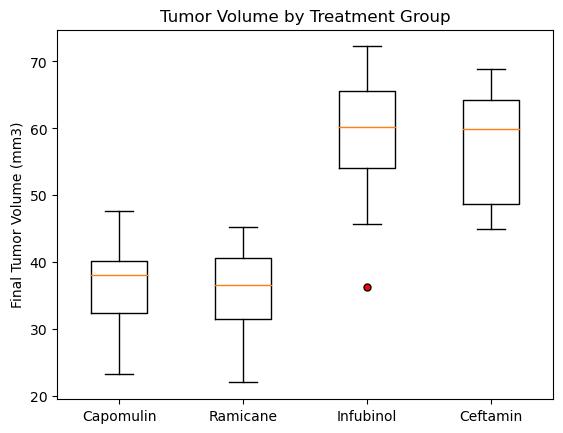

In [103]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "red", markersize=5)
plt.boxplot([capomulin, ramicane, infubinol, ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume by Treatment Group')

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

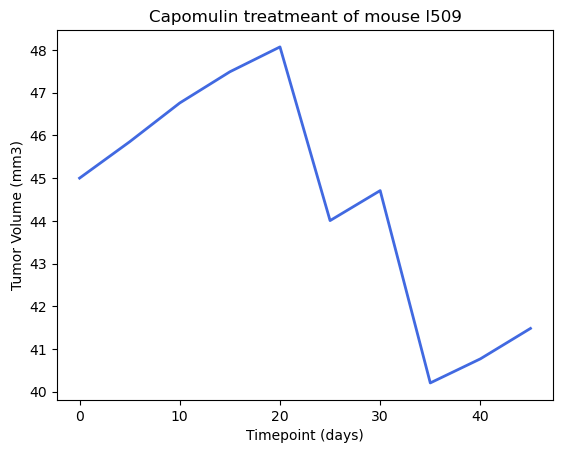

In [104]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Select data with only Capomulin
capomulin_data = data_complete.loc[data_complete["Drug Regimen"] == "Capomulin",:]

# Locate specific mouse within Capomulin Data
plot_data = capomulin_data.loc[capomulin_data["Mouse ID"] == "l509",:]
plot_data.head()

x_axis = plot_data["Timepoint"]
tumor_size = plot_data["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumor_size,linewidth=2,color="royalblue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

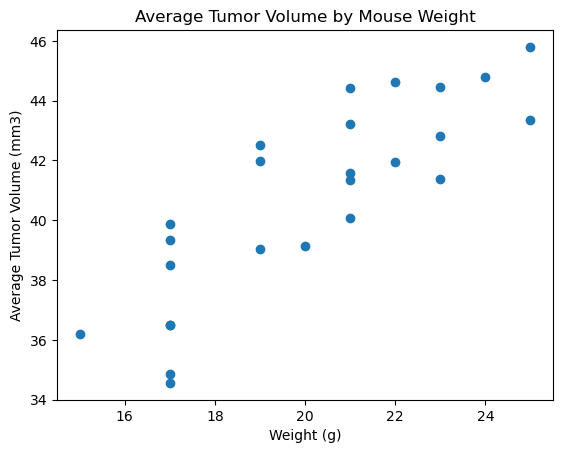

In [105]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Find average tumor volume for each mouse
avg_volume = pd.DataFrame(capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume'})

# Merge average tumor volume onto capomulin_data and drop duplicates
avg_volume = pd.merge(capomulin_data, avg_volume, on='Mouse ID')
final_avg_volume = avg_volume[['Weight (g)', 'Avg Tumor Volume']].drop_duplicates()
final_avg_volume

# Identify variables
x = final_avg_volume['Weight (g)']
y = final_avg_volume['Avg Tumor Volume']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Mouse Weight')

plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


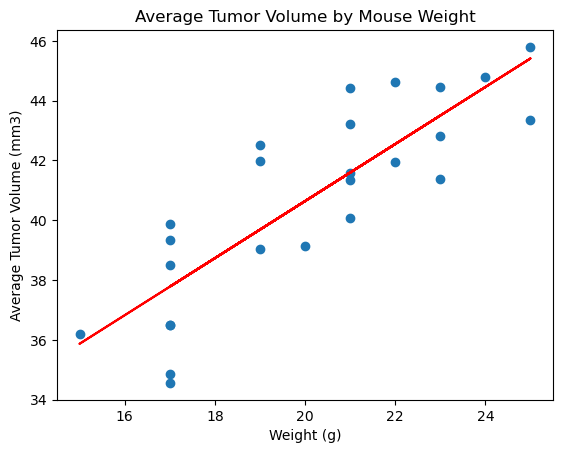

In [106]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Define values
x_values = final_avg_volume['Weight (g)']
y_values = final_avg_volume['Avg Tumor Volume']

# Calculate the correlation coefficient 
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

#Labels and Titles
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Mouse Weight')

plt.show()
